In [1]:
import numpy as np, local, binning as bn, plottools as pl, tools_cmb
from matplotlib.pyplot import *

In [2]:
#qids = local.qid_all
qids = ['boss_d03']
#qids = local.boss_dn

In [3]:
aobj = {q: local.init_analysis_params(qid=q,wind='com16',ivar='noivar') for q in qids}
bobj = {q: local.init_analysis_params(qid=q,wind='com16',ivar='base') for q in qids}
#ocl  = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1] for q in qids}
mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1] for q in qids}
ncl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1] for q in qids}
Mcl  = {q: (np.loadtxt(bobj[q].fscl['c'])).T[1] for q in qids}
Ncl  = {q: (np.loadtxt(bobj[q].fscl['n'])).T[1] for q in qids}
scl  = {q: (np.loadtxt(aobj[q].fscl['s'])).T[1] for q in qids}
vcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[7] for q in qids}
vnl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[7] for q in qids}
vsl  = {q: (np.loadtxt(aobj[q].fscl['s'])).T[7] for q in qids}

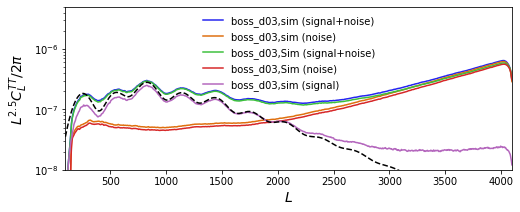

In [12]:
for q in qids:
    pl.plot_1dstyle(fsize=[8,3],xmin=100,xmax=4096,ymin=1e-8,ymax=5e-6,xlab=r'$L$',ylab=r'$L^{2.5} C^{TT}_L/2\pi$',ylog=True)
    #bl = tools_cmb.beam_func(aobj[q].lmax,q)
    l = aobj[q].l
    s = l**3/2./np.pi
    #wnl = (60.*np.pi/10800./2.726e6)**2*(1.+5.*(1000./l)**3.5)
    wnl = (70.*np.pi/10800./2.726e6)**2
    #plot(l,s*ocl[q],label=q+',obs')
    plot(l,s*mcl[q],label=q+',sim (signal+noise)')
    plot(l,s*ncl[q],label=q+',sim (noise)')
    plot(l,s*Mcl[q],label=q+',Sim (signal+noise)')
    plot(l,s*Ncl[q],label=q+',Sim (noise)')
    #plot(l,s*wnl/bl**2,label=q+',white noise')
    plot(l,s*(mcl[q]-ncl[q]),label=q+',sim (signal)')
    plot(l,s*aobj[q].lcl[0,:],color='k',ls='--')
    legend()
    show()

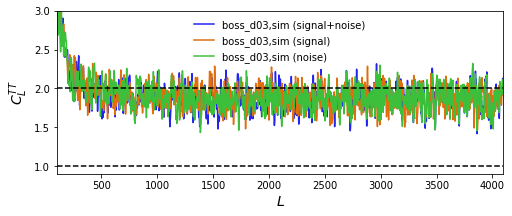

In [5]:
for q in qids:
    pl.plot_1dstyle(fsize=[8,3],xmin=100,xmax=4096,ymin=.9,ymax=3,xlab=r'$L$',ylab=r'$C^{TT}_L$')
    l = aobj[q].l
    plot(l,vcl[q]/(mcl[q]+1e-30)*np.sqrt(l+0.5),label=q+',sim (signal+noise)')
    plot(l,vsl[q]/(scl[q]+1e-30)*np.sqrt(l+0.5),label=q+',sim (signal)')
    plot(l,vnl[q]/(ncl[q]+1e-30)*np.sqrt(l+0.5),label=q+',sim (noise)')
    legend()
    axhline(1,color='k',ls='--')
    axhline(2,color='k',ls='--')
    show()

[ 21.64664476  30.43858198  37.36462288  54.01719554  55.25163994
  72.96768948  85.90939671  78.35362524  62.47201909 205.11470833
 109.26215527  62.3618301  117.68907106 134.04811173  93.9576628
 106.07522678 110.05937189 198.26408996 159.71518996 127.78884247]


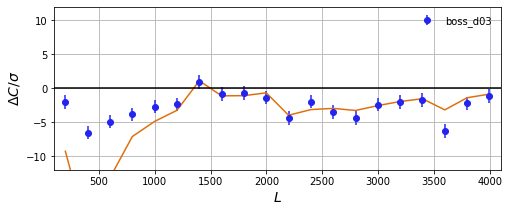

<Figure size 576x216 with 0 Axes>

In [6]:
mb = bn.multipole_binning(20,lmin=100,lmax=4096)
for q in qids:
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj[q].fcls['c'][:10],cn=1)
    print(mcb/vcb)
    #cor = pl.plot_corr(scb,mb.bc,output=True)
    #print(cor)
    pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-12,ymax=12,ylab=r'$\Delta C/\sigma$')
    errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=q)
    plot(mb.bc,100*(ocb/mcb-1))
    axhline(0,color='k')
    legend()
    show()
    clf()